Ref: 莫煩 Moven  https://www.youtube.com/watch?v=UlUGGB7akfE&list=PLXO45tsB95cJxT0mL0P3-G0rBcLSvVkKH&index=16

In [1]:
import torch
import torch.utils.data as Data
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [2]:
LR = 0.01
BATCH_SIZE = 32
EPOCH = 12

# Create training data

In [17]:
x = torch.linspace(-1, 1, 1000).view(1000, 1)
y = x.pow(2) + 0.1*torch.normal(torch.zeros(*x.size()))

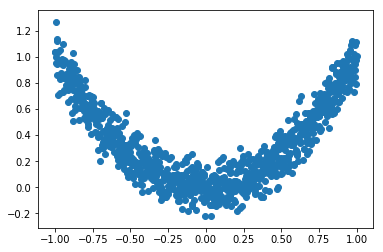

In [18]:
# plot dataset
plt.scatter(x.numpy(), y.numpy())
plt.show()

In [19]:
# put dateset into torch dataset
torch_dataset = Data.TensorDataset(data_tensor=x, target_tensor=y)

# Define a data loader to load data in batches

In [20]:
loader = Data.DataLoader(dataset=torch_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2,)

# Define NN

In [21]:
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(1, 20)   # hidden layer
        self.predict = torch.nn.Linear(20, 1)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [22]:
net_SGD         = Net()
net_Momentum    = Net()
net_RMSprop     = Net()
net_Adam        = Net()
nets = [net_SGD, net_Momentum, net_RMSprop, net_Adam]

# Use different optimizers

In [23]:
opt_SGD         = torch.optim.SGD(net_SGD.parameters(), lr=LR)
opt_Momentum    = torch.optim.SGD(net_Momentum.parameters(), lr=LR, momentum=0.8)
opt_RMSprop     = torch.optim.RMSprop(net_RMSprop.parameters(), lr=LR, alpha=0.9)
opt_Adam        = torch.optim.Adam(net_Adam.parameters(), lr=LR, betas=(0.9, 0.99))
optimizers = [opt_SGD, opt_Momentum, opt_RMSprop, opt_Adam]

In [24]:
loss_func = torch.nn.MSELoss()
losses_his = [[], [], [], []]   # record loss

# Training

In [25]:
print('Epoch: ', end = '')
for epoch in range(EPOCH):
    print(epoch, end = ', ')
    for step, (batch_x, batch_y) in enumerate(loader):          # for each training step
        b_x = Variable(batch_x)
        b_y = Variable(batch_y)

        for net, opt, l_his in zip(nets, optimizers, losses_his):
            output = net(b_x)              # get output for every net
            loss = loss_func(output, b_y)  # compute loss for every net
            opt.zero_grad()                # clear gradients for next train
            loss.backward()                # backpropagation, compute gradients
            opt.step()                     # apply gradients
            l_his.append(loss.data[0])     # loss recoder

Epoch: 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 

# Visualization

In [26]:
labels = ['SGD', 'Momentum', 'RMSprop', 'Adam']

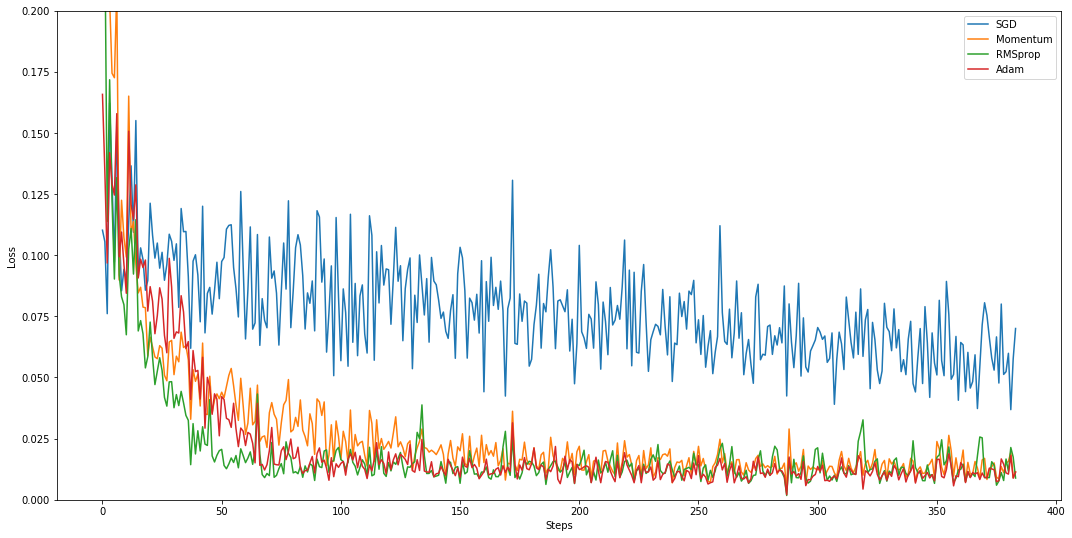

In [27]:
plt.figure(figsize=(18,9)) 
for i, l_his in enumerate(losses_his):
    plt.plot(l_his, label=labels[i])
plt.legend(loc='best')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.ylim((0, 0.2))
plt.show()